In [1]:
# Importing required libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics

In [2]:
# Reading the cleaned and processed data file.

df = pd.read_csv('./Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
# Removing the first column as this column is not useful for us in further processing.

df = df.drop(columns=df.columns[0], axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Encoding all the categorical variables into integers.

df['class'] = df['class'].replace({'Economy': 0, 'Business': 1})
df['stops'] = df['stops'].replace({'zero': 0, 'one': 1, 'two_or_more': 2})
df["airline"] = df["airline"].replace({'Indigo':0, 'AirAsia':1, 'GO_FIRST':2, 'SpiceJet':3, 'Air_India':4, 'Vistara':5})
df['source_city'] = df['source_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['destination_city'] = df['destination_city'].replace({'Delhi': 0, 'Mumbai': 1, 'Bangalore': 2, 'Kolkata': 3, 'Hyderabad': 4, 'Chennai': 5})
df['departure_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
df['arrival_time'] = df['departure_time'].replace({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

In [5]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,3,SG-8709,0,4,0,4,1,0,2.17,1,5953
1,3,SG-8157,0,1,0,1,1,0,2.33,1,5953
2,1,I5-764,0,1,0,1,1,0,2.17,1,5956
3,5,UK-995,0,2,0,2,1,0,2.25,1,5955
4,5,UK-963,0,2,0,2,1,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,5,2,1,2,4,1,10.08,49,69265
300149,5,UK-826,5,3,1,3,4,1,10.42,49,77105
300150,5,UK-832,5,1,1,1,4,1,13.83,49,79099
300151,5,UK-828,5,1,1,1,4,1,10.00,49,81585


In [6]:
# Selecting the numerical features to be standardized
numerical_features = ['duration', 'days_left']
scaler = StandardScaler()

# Standardizing the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [7]:
# Joining the scaled numerical features back to the original DataFrame:
df[['duration', 'days_left']] = df[numerical_features]

In [8]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,3,SG-8709,0,4,0,4,1,0,-1.397531,-1.843875,5953
1,3,SG-8157,0,1,0,1,1,0,-1.375284,-1.843875,5953
2,1,I5-764,0,1,0,1,1,0,-1.397531,-1.843875,5956
3,5,UK-995,0,2,0,2,1,0,-1.386407,-1.843875,5955
4,5,UK-963,0,2,0,2,1,0,-1.375284,-1.843875,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,5,UK-822,5,2,1,2,4,1,-0.297695,1.695692,69265
300149,5,UK-826,5,3,1,3,4,1,-0.250421,1.695692,77105
300150,5,UK-832,5,1,1,1,4,1,0.223718,1.695692,79099
300151,5,UK-828,5,1,1,1,4,1,-0.308819,1.695692,81585


In [9]:
# Excluding the below columnns from the Training and Testing data.
columns_to_exclude = ['flight', 'price']

# Creating a new DataFrame for the Training data and Testing data.
x = df.drop(columns=columns_to_exclude)
y = df[['price']]

#### K-Nearest Neighbour (KNN) Algorithm

In [10]:
selection = ExtraTreesRegressor()
selection.fit(x, y)

# Finding the importance of each input feature.
print('Feature: Importance')
for feature_name, feature_importance in zip(x.columns, selection.feature_importances_):
    print(f"{feature_name}: {feature_importance}")

/var/folders/0z/pmhyplr537q2rp581357th0h0000gn/T/ipykernel_9786/2455270339.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(x, y)


Feature: Importance
airline: 0.011636177446474343
source_city: 0.01066188739756068
departure_time: 0.003323155683641777
stops: 0.03257938368060504
arrival_time: 0.0031991635141357462
destination_city: 0.010160756549313083
class: 0.8805737241942921
duration: 0.02974296939270229
days_left: 0.018122782141274857


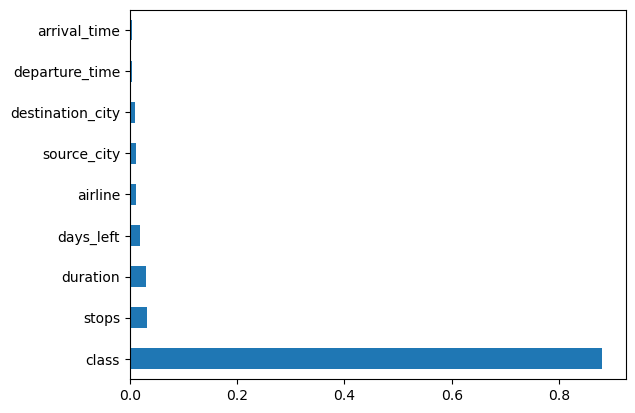

In [11]:
# Visualising the importance of each feature.
feat_importances = pd.Series(selection.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
# Dividing the dataset into Training and Testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the KNN regressor
# Initializing the 'K-value' to 1 arbitrarily.
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

In [13]:
# Performance during Training phase.
knn_model.score(x_train, y_train)

0.998198561496864

In [14]:
# Performance during Testing phase.
knn_model.score(x_test, y_test)

0.9543398511500979

/var/folders/0z/pmhyplr537q2rp581357th0h0000gn/T/ipykernel_9786/1194586501.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


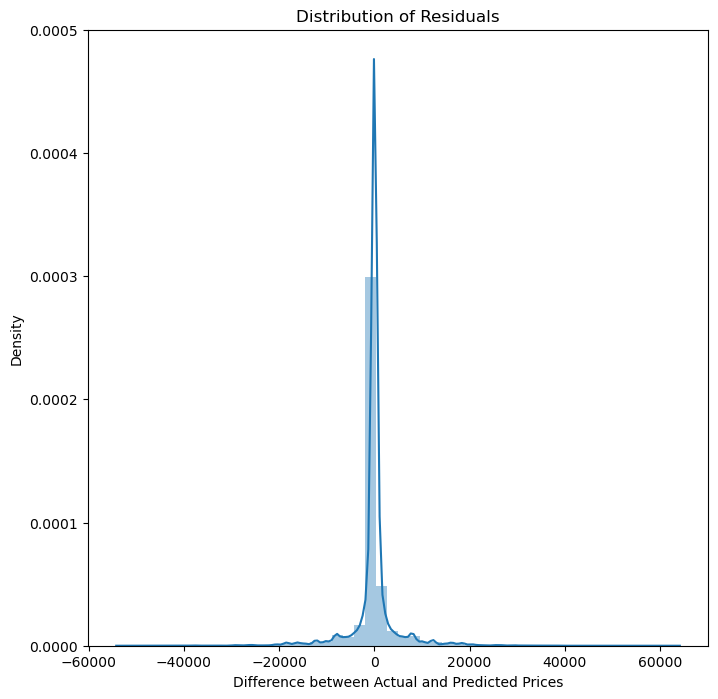

In [15]:
# Visualising the difference between Actual and Predicted Prices.
y_test = y_test.values.flatten() if hasattr(y_test, 'values') else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred

plt.figure(figsize=(8, 8))
sns.distplot(y_test - y_pred)
plt.xlabel('Difference between Actual and Predicted Prices')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

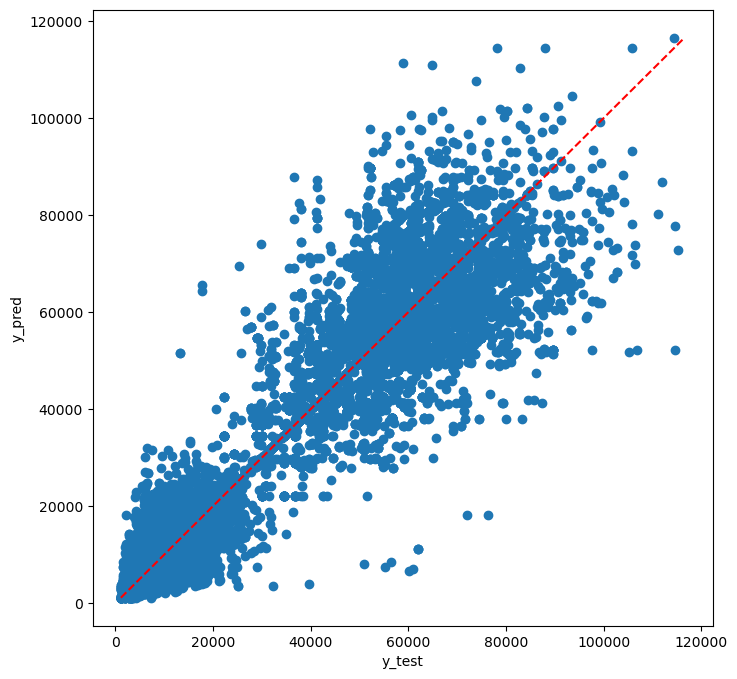

In [16]:
# Visualising the difference between Actual and Predicted Prices.
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Here, we are adding the y = x line in red color to observe the variation between the Actual Price and Predicted Price.
max_val = max(max(y_test.squeeze()), max(y_pred.squeeze()))
min_val = min(min(y_test.squeeze()), min(y_pred.squeeze()))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

#### Hyper Parameter Tuning: Tuning the K-value

In [17]:
accuracy_rate = []

# Finding the optimal value between 1 and 25.
for i in range(1,25):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, x_train,y_train,cv=10,scoring='neg_mean_squared_error')
    accuracy_rate.append(score.mean())
    # accuracy_rate.append(-score.mean())

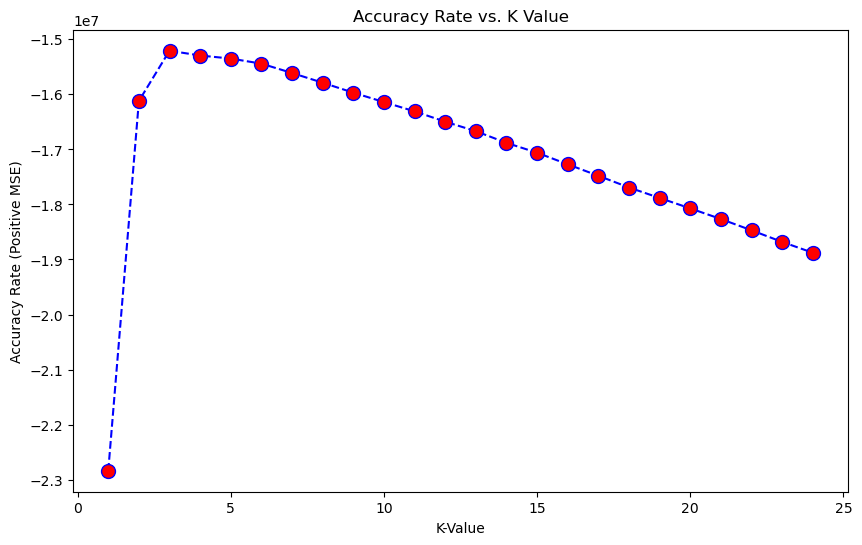

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25), accuracy_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Rate (Positive MSE)')
plt.show()

From the above figure, we can infer that the optimal value for K is 3. Therefore, choosing 3 as our K-value would give us the best result and a better model.

In [19]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(x_train, y_train)

y_pred = knn_model.predict(x_test)

In [20]:
# Performance during Training phase.
knn_model.score(x_train, y_train)

0.9865191804660282

In [21]:
# Performance during Testing phase.
knn_model.score(x_test, y_test)

0.9709094559326898

/var/folders/0z/pmhyplr537q2rp581357th0h0000gn/T/ipykernel_9786/1194586501.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - y_pred)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


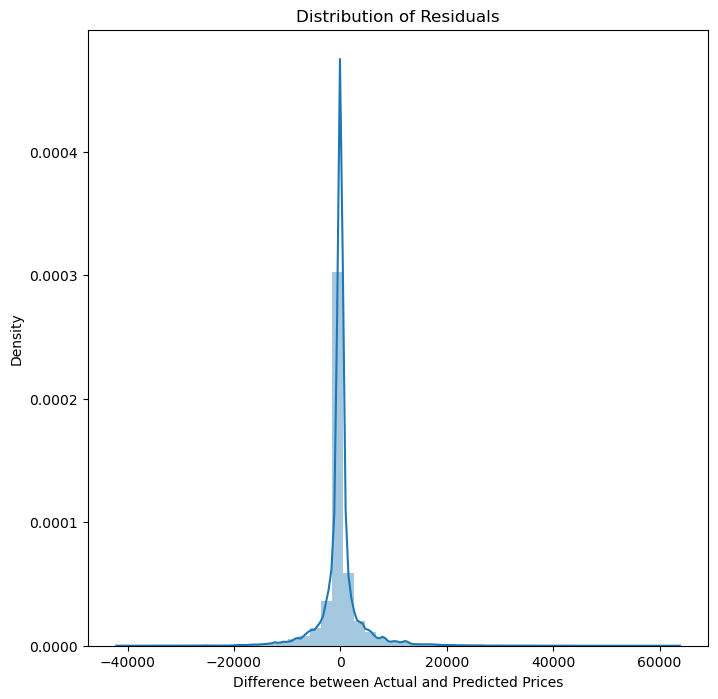

In [22]:
# Visualising the difference between Actual and Predicted Prices.
y_test = y_test.values.flatten() if hasattr(y_test, 'values') else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, 'flatten') else y_pred

plt.figure(figsize=(8, 8))
sns.distplot(y_test - y_pred)
plt.xlabel('Difference between Actual and Predicted Prices')
plt.ylabel('Density')
plt.title('Distribution of Residuals')
plt.show()

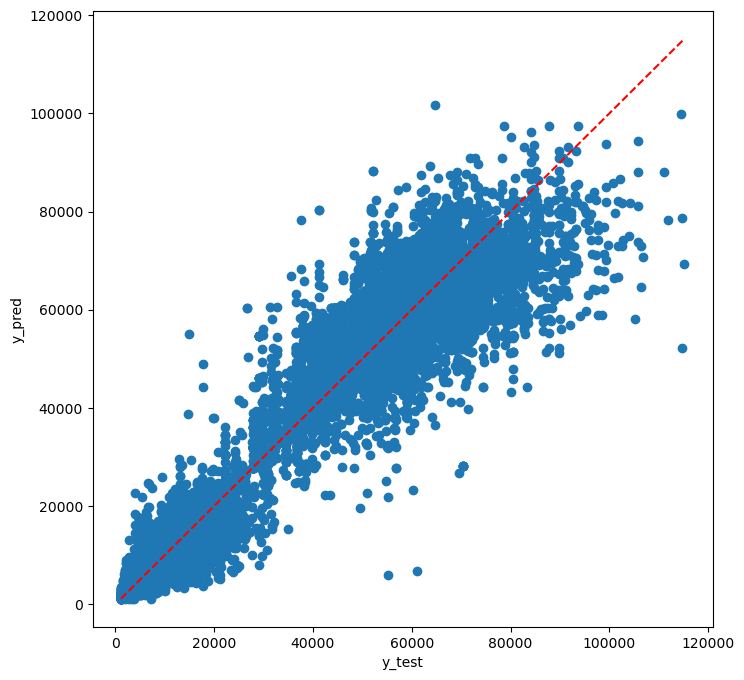

In [23]:
# Visualising the difference between Actual and Predicted Prices.
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

# Here, we are adding the y = x line in red color to observe the variation between the Actual Price and Predicted Price.
max_val = max(max(y_test.squeeze()), max(y_pred.squeeze()))
min_val = min(min(y_test.squeeze()), min(y_pred.squeeze()))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.show()

In [24]:
# Evaluating the KNN model.
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2', metrics.r2_score(y_test,y_pred)) 

MAE: 1800.2341456913928
MSE: 14995659.795172492
RMSE 3872.422987636099
r2 0.9709094559326898
